# Support Vector Machine

## Theoretical overview

Support vector machines are supervised learning alghorithms that can be used both for classification or regression applications.
Here I will focus on their implementations for classification problems, such as the one addressed in this project, briefly explaining the foundamentals of this method (for further details see Géron, 2019).

A support vector machine works constructing, in the feature's space, a set of hyperplanes working as decision boundaries between different classes. The choice of the proper hyperplanes is carried out maximizing their distance to the nearest training data points of any class which are called support vectors.

The following image shows an example of application in a 2-dimensional feature's space (from _Support Vector Machines — scikit-learn 1.0.2 documentation_, n.d.). The dashed lines are called "decision margins" on which lie the support vectors. The SVM method consists in maximizing the area between these margins. 

<center>
<img src="images/svm1.png" width="50%">
</center>

Considering a binary classification problem a SVM can be trained on the dataset of N elements
$$
 D = \{(y_i, \mathbf{x_i}):\hspace{7pt} \mathbf{x_i}\in \mathbb{R}^p;\hspace{7pt} y_i\in \{-1, 1\};\hspace{7pt} i=1,...,N\}
$$
solving the problem
$$
\min_{\mathbf{\beta}, \beta_0, \xi}\left( \frac12 \mathbf{\beta}^T \mathbf{\beta} + C \sum_{i=1}^N \xi_i\right)
$$
subject to the conditions
$$
    y_i(\mathbf{x_i}^T\mathbf{\beta} + \beta_0) \geq 1 - \xi_i, \hspace{7pt} \forall i \\
    \xi_i \geq 0, \hspace{10pt} \forall i
$$

In these equations, the hyperplane that acts as a decision boundary is determined by the vector $\mathbf{\beta}\in \mathbb R^p$ and $\beta_0$ through the equation $\mathbf{x_i}^T\mathbf{\beta} + \beta_0 = 0$ and defines the decision function  $d_i = \mathbf{x_i}^T\mathbf{\beta} + \beta_0$. The first group of conditions require that each point in the training dataset is classified correctly thrugh the rule:

$$
\begin{cases}
\hat y_i = 1, \hspace{7pt} \text{if} \hspace{5pt} d_i\geq 1 \\
\hat y_i = -1 \hspace{7pt} \text{if} \hspace{5pt} d_i\leq -1
\end{cases}
$$

Note that the boundaries for $d_i$ are set to $\pm 1$ but the functional margin can be arbitrarly wide since the norm of $\mathbf{\beta}$ can vary freely. The optimization problem addresses indeed this problem requiring the norm of $\mathbf{\beta}$ to be minimum which is equivalent to maximizing the area between the decision margins.
For each element $i$ in the dataset, the additional parameter $\xi_i$ is also introduced. It measures the distance of the point $i$ from its correct decision margin allowing some of the points to cross it.
The second addend, of the optimized function, requires these parameters to be minimum introducing a hyperparameter $C$ that controls the strength of this penalty. Allowing data points to cross the margins helps training more flexible models reducing overfitting and generalization errors.

This optimization problem can be solved using Karush–Kuhn–Tucker (KKT) conditions, which lead to the dual problem 
$$
\min_{\alpha_i}\left( \sum_{i=1}^N \alpha_i -\frac12 \sum_{i=1\\i'=1}^N \alpha_i\alpha_{i'}y_iy_{i'}\mathbf{x_i}^T\mathbf{x_{i'}}\right)
$$
subject to
$$
    \alpha_i \geq 0 \hspace{5pt} \forall i
$$
From the $\alpha_i$ values is then possible to compute $\beta$ and $\beta_0$ obtaining the solution of the original problem.

The main limitation of this method as so far presented is the linear nature of boundaries between classes in the features's space. Some problems are not linearly separable. To overcome this limitation the feature space can be expanded mapping each data point in a new point whose coordinates are determined applying some functions to the original features.
This means mapping, for example, $\mathbf{x_i} \in \mathbb R^p$ to
$$
    \mathbf{h}\left[\left(\begin{array}{c}
    x_1\\x_2\\x_3
    \end{array}
    \right)\right] =  \left(
    \begin{array}{c}
x_1 \\ x_2 \\ x_3  \\ x_1^2 \\ x_2^2 \\ x_3^2
    \end{array} \right)
$$ 
This tecniques does not modify the functioning of the algorithm which still works in the same way on the new features set. However, the complexity of the optimization problem is increased significantly reducing performances and thus requiring larger computational resources.
In order to control the complexity of the optimization problem, the kernel method is used: in the dual optimization problem previously presented it is clear that the feature vectors $\mathbf{x}_i$, which are then substituted by $\mathbf{h}(\mathbf{x_i})$, appear in the function to minimize, only through their dot product $K(\mathbf{h_i}, \mathbf{h_j})$.
Therefore, only the kernel function K is chosen while the mapping function $\mathbf{h}(\mathbf{x})$ in the higher space is implicitly set by the kernel choice. This method is computationally cheaper.

For multi class classification, the library used in this project, `sklearn.svm.SVC`, implements the "one-versus-one" approach: a different classifier is constructed for each pair of classes (_sklearn.svm.SVC — scikit-learn 1.0.2 documentation_, n.d.). 

## Hyperparameters

In the mathematical formulation presented above there are two hyperparameters that must be set during the definition of the model: the constant C and the Kernel.

### The regularization parameter (C)
This constant determines how much penalty should be assigned to data points crossing the decision margins. A higher value of this constant correspond to harder conditions on the margins meaning that their crossing is less tolerated. On the other end, lower values allow softer conditions with opposite implications.
One of the main downsides of hard conditions, i.e. high C, is the risk of overfitting the data leading to large generalization errors when the model is tested on new elements.
A fine tuning of this hyperparameter can help avoid this situation and achieve more flexible models.
In this notebook six values will be tried for each kernel: 0.1, 0.5, 1, 5, 10, 100.

### The Kernel

A kernel is a function of two vectors $\mathbf{x}$ and $\mathbf{x'}$ that computes the dot product of $\mathbf{\phi(x)}$ and $\mathbf{\phi(x')}$ for a certain map $\mathbf{\phi(\cdot)}$, without the need to explicitly compute this map.
In support vector machines they are used, as discussed in the previous section, to efficiently solve the dual optimization problem mapping, with $\phi$, the feature's space to a larger one to overcome the linear nature of the method in problems not solvable with linear decision boundaries.
In this notebook I will try 3 different kernels which are presented below. The default values of their hyperparameters are defined in _sklearn.svm.SVC_.

#### - Linear
$$
K(\mathbf x, \mathbf{x'}) = \mathbf x^T \mathbf{x'}
$$
with this kernel the original features remain unchanged and standard linear margins are fitted by the method.

#### - Polynomial
$$
K(\mathbf x, \mathbf{x'}) = (\gamma \mathbf x^T \mathbf{x'})^d
$$
This kernel corresponds to a polynomial map of the original features. It is characterized by two hyperparameters: $d$ controls the degree of the polynomial map, the default value used in the following implementation is 3;
$\gamma$ is a hyperparameter used to rescale the feature's product whose the default value used here is `1/(n_features*X.var())`.

#### - Radial Basis Function (rbf)
$$
K(\mathbf x, \mathbf{x'}) = \text{exp}(-\gamma \Vert \mathbf x - \mathbf{x'}\Vert^2)
$$
This kernel is associated to a map $\phi$ of the original feature's space to an infinite dimensional space. The $\gamma$ hyperparameter has the same role of the one in the previous kernel with also the same default value.

## Training 

In [2]:
import my_utils as u
import numpy as np
import pickle
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

In [2]:
#retrieve the training dataset
x_train, y_train, class_labels = u.get_images(u.train_files)

#SVC requires an input array of shape (n_samples, n_features)
x_train = np.reshape(x_train, newshape=(x_train.shape[0], -1))
x_train = x_train/256

100%|██████████| 22348/22348 [00:24<00:00, 925.06it/s] 


In [3]:
x_train.shape

(22348, 12780)

In [4]:
from sklearn.svm import SVC
from timeit import default_timer as timer

#I am going to try different models: C=0.1,0.5,1,5,10,100
#for linear, rbf and poly kernels
#manually implementing grid search

#defining hyperparameters to try
c_totry = [0.1,0.5,1,5,10,100]
kernels_totry = ['linear','rbf', 'poly']

#starting training
for k in kernels_totry:
    for c in c_totry:
        tstart = timer()
        classifier=SVC(C=c, kernel=k)
        classifier.fit(x_train, y_train)
        tend = timer()
        with open(f"{k}svc_{c}.model", 'wb') as fmod:
            pickle.dump(classifier, fmod)
        with open(f"run_times.txt", "a") as ftimes:
            ftimes.write(f"{k}svc_{c}.model,\t{tend-tstart}\n")

## Results

I will use different methods to compare the results of the 18 models trained in the previous section. All of these methods rely on the confusion matrix which is defined such as a matrix whose component $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.

The following cells compute and show the confusion matrices obtained applying each of the trained models to the test set of the gravity spy dataset.

In [3]:
#loading test set and reshaping it in the correct shape
x_test, y_test, test_data = u.get_images(u.test_files)
x_test = np.reshape(x_test, newshape=(x_test.shape[0], -1))
x_test = x_test/256

100%|███████████████████████████████████████| 4720/4720 [00:03<00:00, 1205.91it/s]


In [ ]:
#loading all the models
kernels = ['linear', 'rbf', 'poly']
c_totry = [0.1,0.5,1,5,10,100]
results_df = pd.DataFrame()
for k in kernels:
    for c in c_totry:
        filename = f"{k}svc_{c}.model"
        print(f'opening model {filename}')
        with open(filename, 'rb') as f:
            classifier = pickle.load(f)

        new_entry = {'model_file': filename, 'kernel': k, 'c': c, 'model_label': f'{k} (c={c})', 'classifier': classifier}
        results_df = results_df.append(new_entry, ignore_index=True)


opening model linearsvc_0.1.model
opening model linearsvc_0.5.model
opening model linearsvc_1.model
opening model linearsvc_5.model
opening model linearsvc_10.model
opening model linearsvc_100.model
opening model rbfsvc_0.1.model
opening model rbfsvc_0.5.model
opening model rbfsvc_1.model
opening model rbfsvc_5.model
opening model rbfsvc_10.model
opening model rbfsvc_100.model
opening model polysvc_0.1.model


Here are shown all the trained models

In [4]:
results_df

,c,classifier,kernel,model_file,model_label
0,0.1,"SVC(C=0.1, kernel='linear')",linear,linearsvc_0.1.model,linear (c=0.1)
1,0.5,"SVC(C=0.5, kernel='linear')",linear,linearsvc_0.5.model,linear (c=0.5)
2,1.0,"SVC(C=1, kernel='linear')",linear,linearsvc_1.model,linear (c=1)
3,5.0,"SVC(C=5, kernel='linear')",linear,linearsvc_5.model,linear (c=5)
4,10.0,"SVC(C=10, kernel='linear')",linear,linearsvc_10.model,linear (c=10)
5,100.0,"SVC(C=100, kernel='linear')",linear,linearsvc_100.model,linear (c=100)
6,0.1,SVC(C=0.1),rbf,rbfsvc_0.1.model,rbf (c=0.1)
7,0.5,SVC(C=0.5),rbf,rbfsvc_0.5.model,rbf (c=0.5)
8,1.0,SVC(C=1),rbf,rbfsvc_1.model,rbf (c=1)
9,5.0,SVC(C=5),rbf,rbfsvc_5.model,rbf (c=5)


In [5]:
#computing the predictions of each model
results_df['predicted_y'] = results_df['classifier'].progress_apply(lambda classif: [classif.predict(x_test)])

#this cell can take several minutes to run,
#the results are thus dumped on a file 
#to access them in a different session without the need of 
#rerunning this cell
with open('results_df.dump', 'wb') as f:
            pickle.dump(results_df.drop('classifier', 1), f)

100%|██████████| 18/18 [4:03:15<00:00, 810.87s/it]


In [18]:
#reading previously computed results from file
with open('results_df.dump', 'rb') as f:
    try:
        results_df = pickle.load(f)
    except EOFError:
        print('EOFerror')
        pass

The cells above retrieved the trained models and computed the predictions on the test set. 

The following cells compute the confusion matrices.

In [8]:
from sklearn.metrics import confusion_matrix

#computing confusion matrix for each model
results_df['cmatrix'] = results_df['predicted_y'].progress_apply(lambda y_pred: confusion_matrix(y_test, y_pred[0]))

#computing, for each model, the confusion matrix 
#with each element normalized with the number of elements 
#belonging to the same true class
results_df['cmatrix_truen'] = results_df['predicted_y'].progress_apply(lambda y_pred: confusion_matrix(y_test, y_pred[0], normalize='true'))

#computing, for each model, the confusion matrix 
#with each element normalized with the number of elements 
#belonging to the same predicted class
results_df['cmatrix_predn'] = results_df['predicted_y'].progress_apply(lambda y_pred: confusion_matrix(y_test, y_pred[0], normalize='pred'))

100%|██████████| 18/18 [00:00<00:00, 213.90it/s]


In [ ]:
#plotting the confusion matrices
from matplotlib import pyplot as plt
fig, axs = plt.subplots(3,6, figsize=(15, 8), constrained_layout=True,
                        sharex=True, sharey=True)

c_tried = [0.1, 0.5, 1, 5, 10,100]
k_tried = ['linear', 'poly','rbf']

for i_k in range(0,3):
    for i_c in range(0,6):
        cmat = results_df[(results_df.c == c_tried[i_c]) & (results_df.kernel == k_tried[i_k])]['cmatrix'].iloc[0]
        im = axs[i_k][i_c].imshow(cmat, cmap='Blues')
        axs[i_k][i_c].set_title(f"kernel: {k_tried[i_k]}, C={c_tried[i_c]}")
        axs[i_k][i_c].set_xticks(range(0,22))
        axs[i_k][i_c].set_yticks(range(0,22))
        axs[i_k][i_c].tick_params(axis='both', which='major', labelsize=7)

fig.suptitle('Unnormalized confusion matrices', fontsize=20)
fig.supxlabel('predicted class')
fig.supylabel('actual class')
#cbar_ax = fig.add_axes( ax=axes.ravel().tolist())
fig.colorbar(im,  ax=axs.ravel().tolist())
fig.text(1.05, 0.92, "Class labels and frequency\n in the test set", fontsize=15)
#generate class legend
class_labels = u.get_class_labels()
class_labels['test_perc'] = class_labels['n_test']*100/class_labels['n_test'].sum()
classes=""
perc=""
for i, row in class_labels.iterrows():
    classes = classes + f"{row['class_id']:>2}:  {row['class'].replace('_', ' '):<25}\n"
    perc = perc + f"{row['test_perc']:>5.2f}%\n"

fig.text(1.05, 0.30, classes, fontsize=12)
fig.text(1.3, 0.30, perc, fontsize=12) 
fig.show()

<center>
<img src="images/conf1svm.png" width="100%">
</center>

The figure above shows the confusion matrices of the 18 models trained. The confusion matrix of a perfect model that predicts precisely each element has null off-diagonal values. Looking at this figure it is possible to do a first qualitative evaluation of the models' performances: for example the model with a rbf kernel and C=0.1 (lower left angle) appears to make significant errors identyfing elements of several different classes as "Blips". 

However, little information can be obtained from the other images and even some diagonal elements seem to have values of the same magnitude of off-diagonal ones.
The reason behind this is that the test set, just as the training set, is heavily unbalanced. 
This characteristic will have to be taken into account during the discussion of some evaluation metrics. Starting from the confusion matrix, more explanatory images are obtained plotting the normalized confusion matrices. In the images below each element is normalized with the total number of elements belonging to the same true class. The other type of normalization computed and discussed above does not provide significantly different results, at least from a qualitative point of view.

In [ ]:
fig, axs = plt.subplots(3,6, figsize=(15, 8), constrained_layout=True,
                        sharex=True, sharey=True)

for i_k in range(0,3):
    for i_c in range(0,6):
        cmat = results_df[(results_df.c == c_tried[i_c]) & (results_df.kernel == k_tried[i_k])]['cmatrix_truen'].iloc[0]
        im = axs[i_k][i_c].imshow(cmat, cmap='Blues')
        axs[i_k][i_c].set_title(f"kernel: {k_tried[i_k]}, C={c_tried[i_c]}")
        axs[i_k][i_c].set_xticks(range(0,22))
        axs[i_k][i_c].set_yticks(range(0,22))
        axs[i_k][i_c].tick_params(axis='both', which='major', labelsize=7)

fig.suptitle('Confusion matrices normalized with true number of elements in each class', fontsize=20)
fig.supxlabel('predicted class')
fig.supylabel('actual class')
#cbar_ax = fig.add_axes( ax=axes.ravel().tolist())
fig.colorbar(im,  ax=axs.ravel().tolist())
fig.text(1.05, 0.92, "Class labels and frequency\n in the test set", fontsize=15)
#generate class legend
class_labels = u.get_class_labels()
class_labels['test_perc'] = class_labels['n_test']*100/class_labels['n_test'].sum()
fig.text(1.05, 0.30, classes, fontsize=12)
fig.text(1.3, 0.30, perc, fontsize=12) 
fig.show()

<center>
<img src="images/conf2svm.png" width="100%">
</center>

In this figure showing normalized confusion matrices, it is possible to better appreciate classification errors made by the different models, and have a first qualitative idea of which hyperparameters can provide the better results. 
From this picture, all kernels seem to perform better with higher C values.

Furthermore, this figure shows how most models fail in their predictions in similar ways. For example, several elements in the "Paired Doves" class are misclassified as "Extremely Loud" in most of the models. 

Until now I have provided only a qualitative comparison of the models. A detailed, quantitative comparison will now be carried out computing different evaluation metrics.
These metrics try to summarize all the information contained in the confusion matrix in a single value indicative, in different ways, of the model performance.

To introduce these metrics let first consider the binary classification problem. In this context, two basic metrics are defined which are then used as building blocks for most of the others: precision and recall.

Precision is defined as 

$$
    \text{Precision} = \frac{TP}{TP+FP}
$$

thus measuring the fraction of elements actual positive elements among the ones classified, by the model, as postive (TP stands for True Positive while FP stands for False Positive). Note that false negatives do not appear in the definition of precision. This metric is thus providing an indication of how much we can trust the model when it predicts an element to be positive.

Recall is instead defined as

$$
\text{Recall} = \frac{TP}{TP+FN}
$$

thus measuring the fraction of elements correctly classified in the positive class. This metric is providing a measure of the model's ability to find all the positive elements.

For multi class classification tasks, the definitions above need to be changed and new metrics are defined (Grandini et al., 2020).
The first metric considered is accuracy which captures the same concept of recall measuring the fraction of correctly predicted elements over the total. It is defined, being $C_{ij}$ the elements of the confusion matrix, as

$$
\text{Accuracy} = \frac{\text{correctly predicted elements}}{\text{total elements}} = \frac{\sum_i C_{ii}}{\sum_{i,j} C_{ij}}
$$

This metric however is not well suited for unbalanced datasets because less populated classes would have a minor impact on its value. For this reason, balanced accuracy is introduced.
Its definition is the following:

$$
\text{Balanced accuracy} = \frac{1}{n_{classes}} \cdot \sum_i \frac{C_{ii}}{\sum_j{C_{ij}}}
$$

which is the arithmetic mean of the recall metric computed separately for each class.

The following table and image show the values of these metrics for the 18 trained models.

In [16]:
#Accuracy and  balanced accuracy
def compute_balacc(cmat):
    bacc = 0
    for i, row in enumerate(cmat):
        bacc += row[i]/row.sum()
    return bacc/len(cmat)
results_df['accuracy'] = results_df['cmatrix'].progress_apply(lambda cmat: cmat.trace()/cmat.sum())
results_df['balanced_accuracy'] = results_df['cmatrix'].progress_apply(lambda cmat: compute_balacc(cmat))

100%|██████████| 18/18 [00:00<00:00, 7078.99it/s]


In [21]:
results_df[['classifier', 'accuracy', 'balanced_accuracy']]

,classifier,accuracy,balanced_accuracy
0,"SVC(C=0.1, kernel='linear')",0.931144,0.850016
1,"SVC(C=0.5, kernel='linear')",0.929873,0.849278
2,"SVC(C=1, kernel='linear')",0.924364,0.845418
3,"SVC(C=5, kernel='linear')",0.922881,0.851395
4,"SVC(C=10, kernel='linear')",0.922246,0.848367
5,"SVC(C=100, kernel='linear')",0.920551,0.843932
6,SVC(C=0.1),0.736653,0.451225
7,SVC(C=0.5),0.876483,0.690136
8,SVC(C=1),0.894492,0.729066
9,SVC(C=5),0.932203,0.851311


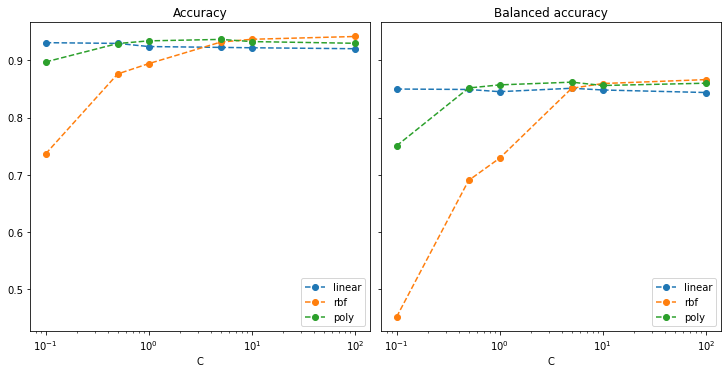

In [22]:
fig, axes = plt.subplots(1,2, figsize=(10, 5), constrained_layout=True,
                        sharex=True, sharey=True)
for k in results_df['kernel'].unique():
    axes[0].plot(results_df[results_df.kernel==k]['c'], results_df[results_df.kernel==k]['accuracy'], marker='o', linestyle='--', label=k)
    axes[1].plot(results_df[results_df.kernel==k]['c'], results_df[results_df.kernel==k]['balanced_accuracy'], marker='o', linestyle='--', label=k)

axes[0].set_title('Accuracy')
axes[1].set_title('Balanced accuracy')
axes[0].set_xscale('log')
axes[0].set_xlabel('C')
axes[1].set_xlabel('C')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')

Qualitatively accuracy and balanced accuracy exhibit the same trend. With linear svc similar values are obtained indipendently to the C parameter. Polynomial and rbf kernels appear to perform better than linear svc for sufficiently high values of the regularization parameter.

However, the balanced accuracy assumes significantly lower values probably due to some classification errors in less populated classes. 
These values do not reach 90%.

Both the accuracy and the balanced accuracy, measure the fraction of correct predictions among the total number of cases examined.

I computed two additional metrics: the F1-score and the Matthew Correlation Coefficient (Grandini, 2020).

The F1-score aggregates recall and precision computing their harmonic mean. It is thus defined as:
$$
\text{F1-score} = \frac{2}{\text{precision}^{-1} + \text{recall}^{-1}}
$$
For a binary classification problem this definition does not require further explanation. However, for multi-class problems the definitions of precision and accuracy can be generalized in different ways. 
I will use the definitions used to compute the macro F1-Score which treats each class in the same way without distinction between high and low populated classes making it a suitable choice for unbalanced datasets as the one used here.
With this choice precision and recall are defined as:
$$
    \text{Precision} = \frac 1 K \sum_k \frac{TP_k}{TP_k + FP_k} \\
    \text{Accuracy} = \frac 1 K \sum_k \frac{TP_k}{TP_k + FN_k}
$$
where the index $k$ runs over the $K$ classes. These definitions are just arithmetic means of the two metrics computed separately for each class.
F1-score takes values in the range \[0;1\]. The harmonic mean tends to give more weight to lower values thus causing a significant drop of the metric when the accuracy or the recall is low.

The Matthew Correlation Coefficient, for multiclass classification is defined as follows:
$$
    MCC = \frac{c\cdot s - \sum_k^K(p_k \cdot t_k)}{\sqrt{(s^2-\sum_k^Kp_k^2)\cdot(s^2 - \sum_k^Kt_k^2)}} \\
$$
where:

$c = \sum_k^K C_{kk}$ total number of correctly predicted elements

$s = \sum_i^K \sum_j^K C_{ij}$ total number of elements

$p_k = \sum_i^K C_{ki}$ number of times that the class k was predicted

$t_k = \sum_i^K C_{ik}$ number of elements truly of the class k

MCC is, in essence, a correlation coefficient between the correct and predicted labels. It takes values in the range \[-1;1\] where 1 indicates a perfect prediction, 0 an average random prediction while -1 indicates an inverse prediction. In the latter case it is usually possible to correct some errors in the implementation to obtain good predictions. This coefficients takes into account the entire confusion matrix and is usually considered a measure with balanced contributions from each class which makes it suited for unbalanced datasets.

In [23]:
#F1 score
def compute_macroF1(cmat):
    mprec = 0
    mrec = 0
    #compute macro precision and macro recall
    for i in range(0, len(cmat)):
        mprec += (cmat[i][i]/(cmat[:,i].sum()+1e-20))
        mrec  += (cmat[i][i]/cmat[i].sum())
   
    mprec /= len(cmat)
    mrec  /= len(cmat)

    return 2*(mprec*mrec)/(mprec+mrec)

def compute_MCC(cmat):
    c = cmat.trace()
    s = cmat.sum()
    p = [cmat[:,k].sum()+1e-20 for k in range(0, len(cmat))]
    t = [cmat[k].sum() for k in range(0, len(cmat))]

    mcc = (c*s - np.dot(p,t))/np.sqrt((s**2-np.dot(p,p))*(s**2-np.dot(t,t)))
    return mcc

In [24]:
results_df['macroF1'] = results_df['cmatrix'].progress_apply(lambda cmat: compute_macroF1(cmat))
results_df['MCC'] = results_df['cmatrix'].progress_apply(lambda cmat: compute_MCC(cmat))

100%|██████████| 18/18 [00:00<00:00, 3440.30it/s]


The following table and figure show the results obtained computing these metrics:

In [25]:
results_df[['classifier', 'macroF1', 'MCC']]

,classifier,macroF1,MCC
0,"SVC(C=0.1, kernel='linear')",0.874281,0.923925
1,"SVC(C=0.5, kernel='linear')",0.872547,0.922510
2,"SVC(C=1, kernel='linear')",0.867138,0.916435
3,"SVC(C=5, kernel='linear')",0.869680,0.914818
4,"SVC(C=10, kernel='linear')",0.864445,0.914115
5,"SVC(C=100, kernel='linear')",0.860666,0.912240
6,SVC(C=0.1),0.542700,0.711926
7,SVC(C=0.5),0.722294,0.864479
8,SVC(C=1),0.782393,0.884236
9,SVC(C=5),0.875417,0.925102


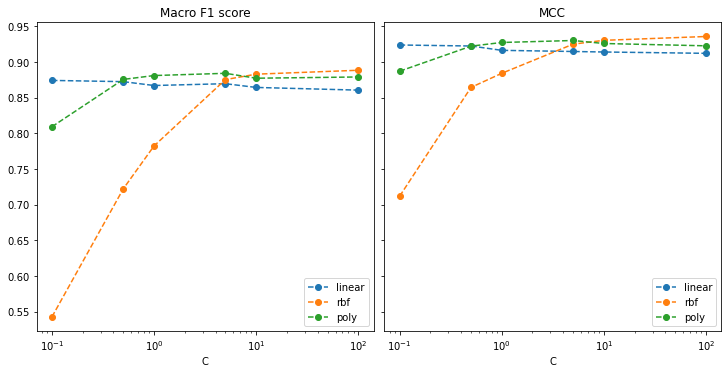

In [26]:
fig, axes = plt.subplots(1,2, figsize=(10, 5), constrained_layout=True,
                        sharex=True, sharey=True)
for k in results_df['kernel'].unique():
    axes[0].plot(results_df[results_df.kernel==k]['c'], results_df[results_df.kernel==k]['macroF1'], marker='o', linestyle='--', label=k)
    axes[1].plot(results_df[results_df.kernel==k]['c'], results_df[results_df.kernel==k]['MCC'], marker='o', linestyle='--', label=k)

axes[0].set_title('Macro F1 score')
axes[1].set_title('MCC')
axes[0].set_xscale('log')
axes[0].set_xlabel('C')
axes[1].set_xlabel('C')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')

In this case these new metrics do not seem to provide new insights on the behaviour of the trained models. The same observations made discussing the accuracy are still valid.

## Conclusions

In this notebook I have applied a support vector machine to the gravity spy dataset exploring different values for the two main hyperparameters that characterize this machine learning method.

Among the 3 kernels tried, the linear one appears, generally, to be the worst even if it performs better than the others for the lowest C value.

The best accuracy of 94.19% (and balanced accuracy of 86.65%) were obtained with the rbf kernel using C=100.

The scores obtained with the polynomial kernel and C=5, are the second best ones: accuracy=93.69%, balanced accuracy=86.21%.

However, these two model require significatively different times when applied to new data. In the following cells I have used the %%timeit directive to measure the time needed to classify 100 images.

In [5]:
%%timeit
#opening best SVM classifier
with open('polysvc_5.model', 'rb') as f:
        classifier = pickle.load(f)
        classifier.predict(x_test[0:100])

13 s ± 2.22 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit
#opening best SVM classifier
with open('rbfsvc_100.model', 'rb') as f:
        classifier = pickle.load(f)
        classifier.predict(x_test[0:100])

23.5 s ± 2.01 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


The results clearly show that the model using the polynomial kernel is faster. Since the scores obtained are very similar I have selected it as the best SVM classifier.

## References

Géron, Aurélien. _Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems._ O'Reilly Media, 2019.

Grandini, Margherita, Enrico Bagli, and Giorgio Visani. _Metrics for multi-class classification: an overview._ arXiv preprint arXiv:2008.05756 (2020).

scikit-learn developers, _sklearn.svm.SVC — scikit-learn 1.0.2 documentation_, Available at: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

scikit-learn developers, _Support Vector Machines  — scikit-learn 1.0.2 documentation_, Available at: https://scikit-learn.org/stable/modules/svm.html (Accessed: 01/2022).